In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_olivetti_faces
%matplotlib inline

In [47]:
faces = fetch_olivetti_faces(data_home='./Data/OlivettiFaces')
data = faces.data   # (400, 4096)
imgs = faces.images # (400, 64, 64) -> 64 * 64 = 4096

In [48]:
pca = PCA(n_components=0.5, svd_solver="full")  # save 50% information
pca.fit(data)
print(sum(pca.explained_variance_ratio_))

0.5077363699674606


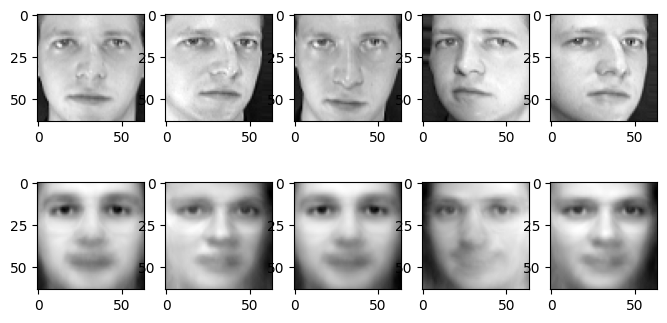

In [49]:
# show origin imgs and processed imgs(number = 5)
data = data[:5, :]  # (5, 4096)

pca_data = pca.transform(data) # (5, 4)
pca_imgs = pca.inverse_transform(pca_data) # (5, 4096)

_, axs = plt.subplots(2, 5, figsize=(8, 4))
for i, (img, pca_img) in enumerate(zip(data, pca_imgs)):
    axs[0, i].imshow(img.reshape([64, 64]), cmap='grey'); axs[1, i].imshow(pca_img.reshape([64, 64]), cmap='grey') 

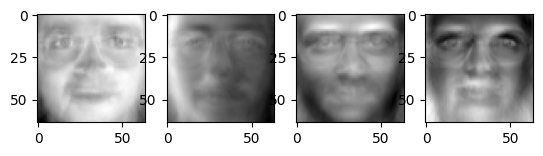

In [50]:
C = pca.get_covariance() # (4096, 4096)
V = pca.components_
for i in range(V.shape[0]):
    plt.subplot(1, V.shape[0], i+1); plt.imshow(V[i].reshape([64, 64]), cmap='grey')